In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("train.csv")

data.sample(n=5)

,id,date,country,store,product,num_sold
127112,127112,2013-11-13,Italy,Discount Stickers,Kaggle Tiers,423.0
97750,97750,2012-12-22,Canada,Premium Sticker Mart,Holographic Goose,302.0
73105,73105,2012-03-23,Finland,Premium Sticker Mart,Holographic Goose,231.0
119211,119211,2013-08-17,Kenya,Stickers for Less,Kaggle,35.0
189675,189675,2015-10-09,Kenya,Discount Stickers,Holographic Goose,NaN


all rows complete, except num_sold (96%)

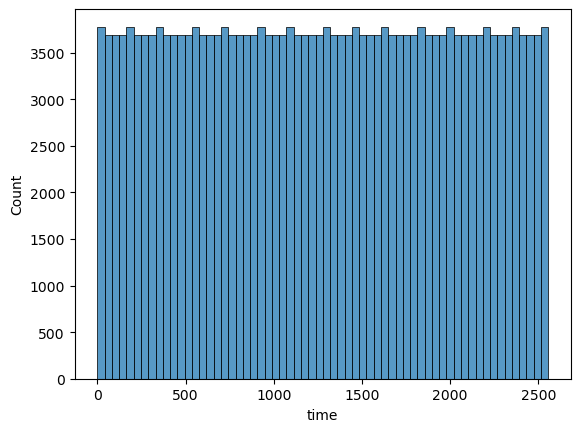

In [39]:
# data
import datetime

start = datetime.datetime.fromisoformat(data['date'].min())
time = np.empty(len(data['date']))
for i,d in enumerate(data['date']):
    time[i] = (datetime.datetime.fromisoformat(d) - start).days
data['time'] = time

g = sns.histplot(data=data, x="time")
#g.set(xlim=(0, 1500))

<AxesSubplot:xlabel='time', ylabel='Count'>

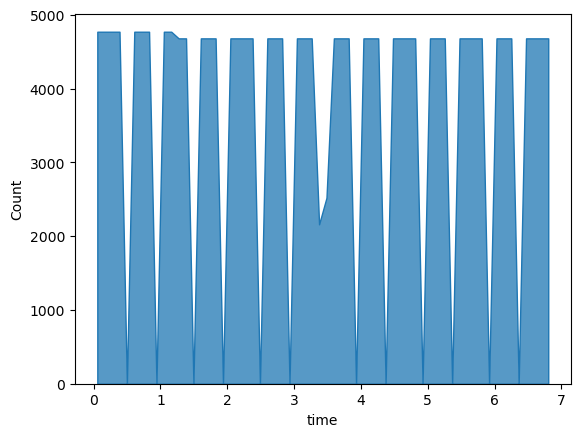

In [29]:
# what are the bumps in the above plot?
data_test = data.copy()
data['time'] = data['time'] % 7
sns.histplot(data=data, x="time", element="poly")

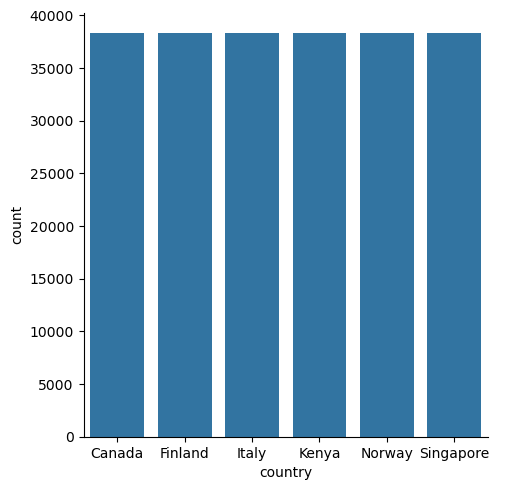

In [5]:
# country
sns.catplot(data=data, kind="count", x="country")

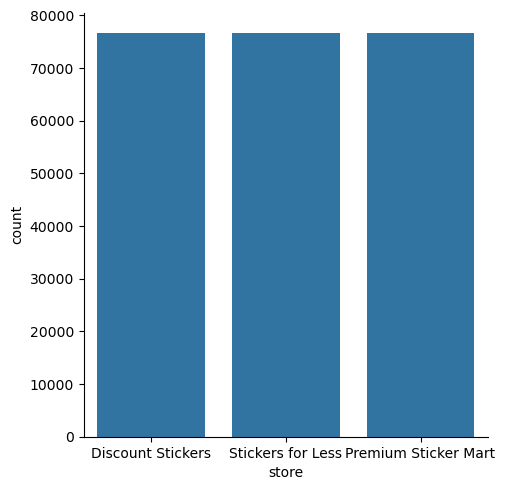

In [6]:
# store
sns.catplot(data=data, kind="count", x="store")

In [8]:
data['store'].value_counts()

Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: store, dtype: int64

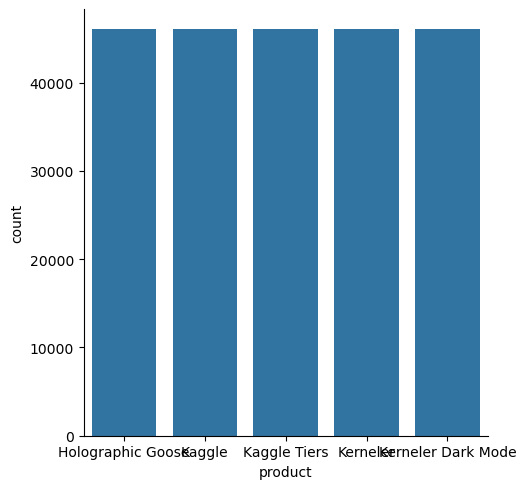

In [7]:
# product
sns.catplot(data=data, kind="count", x="product")

In [16]:
# num_sold
data_num_sold = data.dropna()
print(np.min(data_num_sold['num_sold']), np.max(data_num_sold['num_sold']))

5.0 5939.0


<AxesSubplot:xlabel='num_sold', ylabel='Count'>

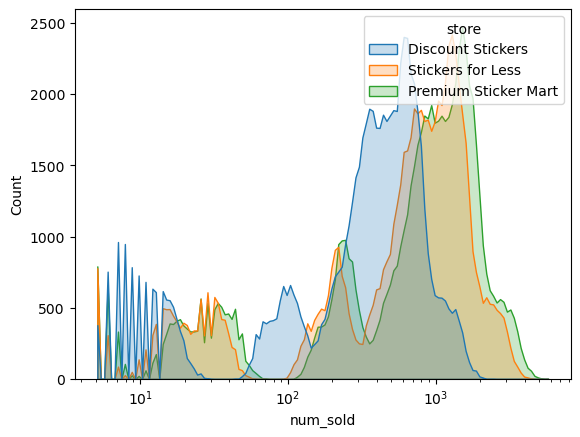

In [17]:
sns.histplot(data=data_num_sold, x="num_sold", hue="store", element="poly", log_scale=True)

<AxesSubplot:xlabel='num_sold', ylabel='Count'>

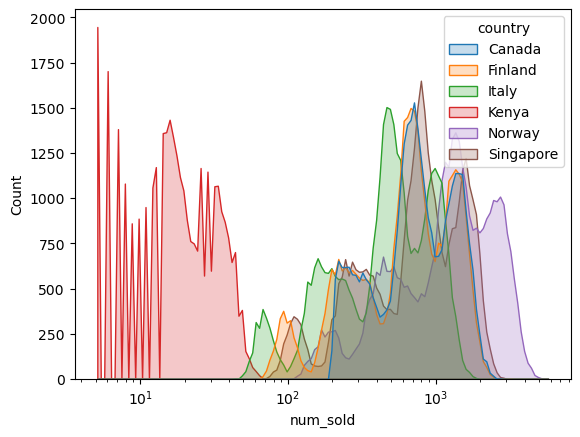

In [18]:
sns.histplot(data=data_num_sold, x="num_sold", hue="country", element="poly", log_scale=True)

<AxesSubplot:xlabel='num_sold', ylabel='Count'>

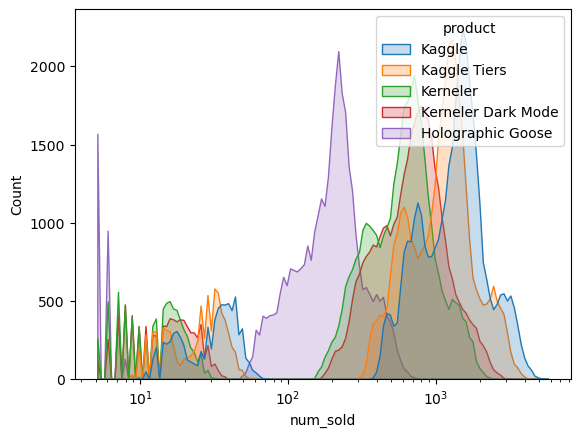

In [19]:
sns.histplot(data=data_num_sold, x="num_sold", hue="product", element="poly", log_scale=True)